## Analysing the Stock Market

In this work we focus on anomaly
detection from the perspective of fundamental factors
and not entirely on technical factors since the latter
itself is very tricky to predict accurately in the short term.

Objectives
1. Identifies the anomalies
in stock prices based on fundamental and technical
factors combined
2. The proposed model uses class-one SVM and local
outlier factor approaches on the transformed data
which has been extracted sector-wise after cleaning
the data set
3. The results are extracted using python and verification
is done by constructing the portfolio. The built-in
portfolio is cross-checked using the current approach
and stocks found under anomalous behavior are
moved out from the portfolio


The following topics will be covered:

1. Downloading stock market data
(using yfinance.download())

2. Calculating stock performance
(Annualized Returns, Annualized Volatility)

3. Evaluating portfolio performance
(Correlation, Portfolio Values, Cumulative Return Ratio, Annualized Returns, Annualized Volatility, Sharpe Ratio)

4. Hierarchical Risk Parity (HRP) and Efficient Frontier
(Optimization, Discrete Allocations)

In [ ]:
!pip install yfinance
!pip install mplfinance
!pip install plotly --user
!pip install seaborn
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 888.2 kB/s eta 0:00:00


In [ ]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from plotly import express as px
import datetime as dt
import os

pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

*Download Data from Yahoo!*

- Load past daily stock prices including “Adj Close”, “Close”, “High”, “Low”, “Open” and “Volume” of 5 stocks which are Telkom SA SOC Ltd (TKG.JO), Alphamin Resources Corp. (APH.JO), Gold Fields Limited (GFI.JO), Bytes Technology Group plc (BYI.JO) and Datatec Limited (DTC.JO).

- Download other periodic data like in minutes, hours, weeks, months and years.

In [ ]:
import yfinance as yf
stock_list = ['TKG.JO', 'APH.JO', 'GFI.JO', 'BYI.JO', 'DTC.JO']
print('stock_list:', stock_list)

interval = '1d'
data = yf.download(stock_list, interval=interval, period='max', start="2017-01-01", end="2023-01-21")

print('data fields download:')
set(data.columns.get_level_values(0))

data.head()

stock_list: ['TKG.JO', 'APH.JO', 'GFI.JO', 'BYI.JO', 'DTC.JO']
[*********************100%%**********************]  5 of 5 completed
data fields download:


Adj Close                                       Close         \
              APH.JO BYI.JO    DTC.JO    GFI.JO    TKG.JO APH.JO BYI.JO   
Date                                                                      
2017-01-02       NaN    NaN 1,564.623 3,719.295 6,094.157    NaN    NaN   
2017-01-03       NaN    NaN 1,577.904 3,749.159 6,085.920    NaN    NaN   
2017-01-04       NaN    NaN 1,581.383 3,774.756 6,177.345    NaN    NaN   
2017-01-05       NaN    NaN 1,560.829 3,907.862 6,156.754    NaN    NaN   
2017-01-06       NaN    NaN 1,590.553 3,875.439 6,149.341    NaN    NaN   

                                           High                             \
              DTC.JO    GFI.JO    TKG.JO APH.JO BYI.JO    DTC.JO    GFI.JO   
Date                                                                         
2017-01-02 4,948.000 4,359.000 7,399.000    NaN    NaN 4,948.000 4,359.000   
2017-01-03 4,990.000 4,394.000 7,389.000    NaN    NaN 5,198.000 4,398.000   
2017-01-04 5,001.000 4,424.000 7,500.000    NaN    NaN 5,100.000 4,492.000   
2017-01-05 4,936.000 4,580.000 7,475.000    NaN    NaN 5,099.000 4,580.000   
2017-01-06 5,030.000 4,542.000 7,466.000    NaN    NaN 5,096.000 4,630.000   

                        Low                                        Open  \
              TKG.JO APH.JO BYI.JO    DTC.JO    GFI.JO    TKG.JO APH.JO   
Date                                                                      
2017-01-02 7,399.000    NaN    NaN 4,948.000 4,359.000 7,399.000    NaN   
2017-01-03 7,455.000    NaN    NaN 4,902.000 4,208.000 7,264.000    NaN   
2017-01-04 7,500.000    NaN    NaN 4,938.000 4,361.000 7,326.000    NaN   
2017-01-05 7,535.000    NaN    NaN 4,917.000 4,364.000 7,355.000    NaN   
2017-01-06 7,560.000    NaN    NaN 4,861.000 4,455.000 7,425.000    NaN   

                                                Volume                 \
           BYI.JO    DTC.JO    GFI.JO    TKG.JO APH.JO BYI.JO  DTC.JO   
Date                                                                    
2017-01-02    NaN 4,948.000 4,359.000 7,399.000    NaN    NaN       0   
2017-01-03    NaN 4,902.000 4,228.000 7,452.000    NaN    NaN  382425   
2017-01-04    NaN 5,100.000 4,423.000 7,400.000    NaN    NaN  491171   
2017-01-05    NaN 4,925.000 4,485.000 7,535.000    NaN    NaN  179221   
2017-01-06    NaN 5,095.000 4,562.000 7,535.000    NaN    NaN  214965   

                             
             GFI.JO  TKG.JO  
Date                         
2017-01-02        0       0  
2017-01-03  3671701  512821  
2017-01-04  2135234  655938  
2017-01-05  2851059  698776  
2017-01-06  2235161  653031

In [ ]:
startdate = '2015-01-01'
enddate = '2023-05-01'
# enddate =   dt.datetime.now().date()    #change to current day date if required
interval = '1d'

In [ ]:
for stock in stock_list:
    df = yf.download(stock, interval=interval, period='max')
    df.to_csv('stocks_data\\{}.csv'.format(stock))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
def appending(cols=[], startdate='', enddate=''):
    '''append stocks data into one file and then select the 'Adj Close' column'''
    dates = pd.date_range(start=startdate, end=enddate)
    df = pd.DataFrame(index=dates)
    for stock in stock_list:
        df_stock = pd.read_csv('stocks_data\\{}.csv'.format(stock), index_col='Date', parse_dates=True, usecols=cols, na_values=['NaN'])
        df_stock = df_stock.rename(columns = {'Adj Close': stock})
        df = df.join(df_stock)
        df = df.loc[dates]
    df.index.names = ['Date']
    df = df.dropna()    #there are other ways to handle missing values. For simplicity, drop them for now
    return df

df = appending(['Date', 'Adj Close'], startdate, enddate)
df.head()

,TKG.JO,APH.JO,GFI.JO,BYI.JO,DTC.JO
Date,,,,,
2020-12-17,"3,330.000",312.145,"12,999.492","6,568.787","1,333.008"
2020-12-18,"3,354.000",312.145,"12,981.265","6,495.651","1,349.601"
2020-12-21,"3,225.000",312.145,"13,007.694","6,447.535","1,341.304"
2020-12-22,"3,261.000",312.145,"12,512.831","6,447.535","1,349.601"
2020-12-23,"3,238.000",338.900,"12,509.185","6,443.686","1,331.901"


Statistics

In [ ]:
df_desc = df.describe().T
df_desc[['count', 'mean', 'std', 'min', '50%', 'max']]

,count,mean,std,min,50%,max
TKG.JO,590.000,"4,156.973",610.436,"2,935.000","4,215.000","5,600.000"
APH.JO,590.000,"1,046.858",320.519,312.145,995.625,"2,843.987"
GFI.JO,590.000,"15,805.813","3,600.281","11,097.794","14,752.057","28,712.000"
BYI.JO,590.000,"8,801.976","1,089.737","6,158.840","8,641.191","12,138.587"
DTC.JO,590.000,"2,348.836",643.089,"1,321.946","2,449.762","3,716.687"


Prices over time view

In [ ]:
from plotly import express as px

px.line(data_frame=df, title='Tickers Adj. Close Prices', width=1000, height=500)

#### We want the Relative Stock Movement

Therefore how much the stock went up or down compared to the other stocks.

*Why :* to provide a standardized measure that removes the influence of absolute price levels. Therefore we need to *Normalize* the stock prices to start with.

**formular: divide the prices of each column by Day-One-Price**

In [ ]:
df.head()

,TKG.JO,APH.JO,GFI.JO,BYI.JO,DTC.JO
Date,,,,,
2020-12-17,"3,330.000",312.145,"12,999.492","6,568.787","1,333.008"
2020-12-18,"3,354.000",312.145,"12,981.265","6,495.651","1,349.601"
2020-12-21,"3,225.000",312.145,"13,007.694","6,447.535","1,341.304"
2020-12-22,"3,261.000",312.145,"12,512.831","6,447.535","1,349.601"
2020-12-23,"3,238.000",338.900,"12,509.185","6,443.686","1,331.901"


In [ ]:
norm = df / df.iloc[0,:]
norm.head()

,TKG.JO,APH.JO,GFI.JO,BYI.JO,DTC.JO
Date,,,,,
2020-12-17,1.000,1.000,1.000,1.000,1.000
2020-12-18,1.007,1.000,0.999,0.989,1.012
2020-12-21,0.968,1.000,1.001,0.982,1.006
2020-12-22,0.979,1.000,0.963,0.982,1.012
2020-12-23,0.972,1.086,0.962,0.981,0.999


Plot the normalized graphs

In [ ]:
fig = px.line(norm, x=norm.index, y=stock_list)
fig.update_layout(title='Stock movement observation by normalizing Adj close prices, (Daily Cumulative Return)',
                  xaxis_title='Date',
                  yaxis_title='Normalized price')
fig.show()

#### Rolling Statistics

Rolling statistics are used to observe trends, patterns and changes over time, while also smoothing out short-term fluctuations.

short-term trends and rapid changes, a smaller window size may be appropriate (e.g., 5-10 periods). For longer-term trends and smoothing out noise, a larger window size (e.g., 20-50 periods) might be more suitable.

In [ ]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = df['APH.JO'].rolling(window=10).mean()
rolling_std = df['APH.JO'].rolling(window=10).std()

# Calculate lower and upper bounds
lowerbound = rolling_mean - (2 * rolling_std)
upperbound = rolling_mean + (2 * rolling_std)

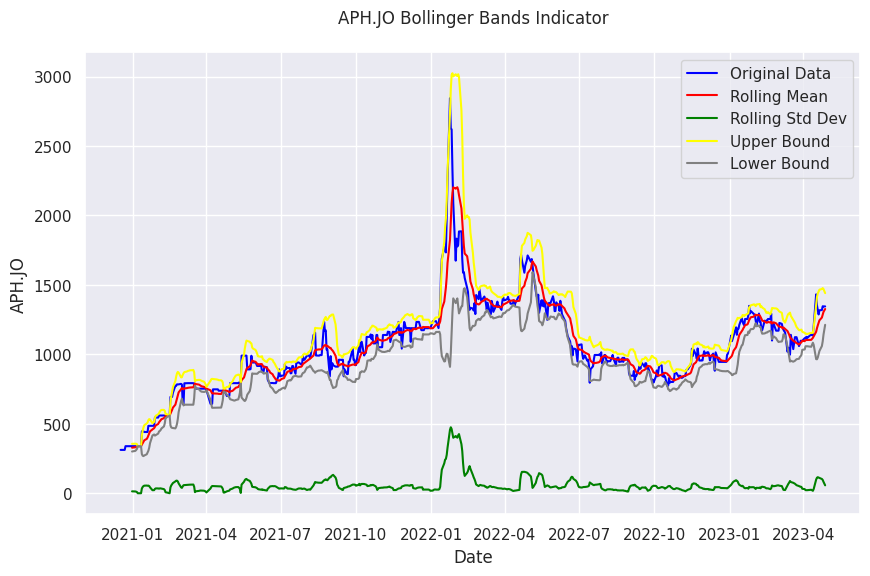

In [ ]:
# Plot the original data and rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['APH.JO'], label='Original Data', color='blue')
plt.plot(df.index, rolling_mean, label='Rolling Mean', color='red')
plt.plot(df.index, rolling_std, label='Rolling Std Dev', color='green')
plt.plot(df.index, upperbound, label='Upper Bound', color='yellow')
plt.plot(df.index, lowerbound, label='Lower Bound', color='grey')
plt.xlabel('Date')
plt.ylabel('APH.JO')
plt.title('APH.JO Bollinger Bands Indicator\n')
plt.legend()
plt.show()

Rolling Mean (Moving Average): We see that the rolling mean provides a clearer view of the overall direction or trend of the data.

Rolling Standard Deviation: The rolling standard deviation is lower when the actual data experiences low volatility

## Metrics and Indicators

These metrics provide insights into factors such as profitability, risk, valuation, and market trends. Here are some key stock market analysis metrics:

- Daily Returns Ratio
- Cummulative Returns Ratio
- Value-at-Risk (VaR): A measure of the maximum potential loss the asset could experience within a given confidence interval and time horizon.
- Sharpe Ratio

### Daily Returns Ratio:

measure the percentage change in the price or value of an asset from one trading day to the next.

DailyReturns(t) = (price[t]/price[t-1])-1

In [ ]:
# To calculate the percentage change for each day
daily_returns = (df / df.shift(1)) -1
daily_returns.iloc[0, :] = 0
daily_returns.head()

,TKG.JO,APH.JO,GFI.JO,BYI.JO,DTC.JO
Date,,,,,
2020-12-17,0.000,0.000,0.000,0.000,0.000
2020-12-18,0.007,0.000,-0.001,-0.011,0.012
2020-12-21,-0.038,0.000,0.002,-0.007,-0.006
2020-12-22,0.011,0.000,-0.038,0.000,0.006
2020-12-23,-0.007,0.086,-0.000,-0.001,-0.013


Annualized Returns

In [ ]:
annualized_returns = df.pct_change().mean().apply(lambda x: x*252)
print(annualized_returns)
print('stock | daily_returns_mean | annualized_returns')
for stock in stock_list:
    print(stock, '|', daily_returns[stock].mean(), '|', round(daily_returns[stock].mean()*252, 3))

TKG.JO   0.110
APH.JO   0.986
GFI.JO   0.455
BYI.JO   0.287
DTC.JO   0.486
dtype: float64
stock | daily_returns_mean | annualized_returns
TKG.JO | 0.00043523360396426 | 0.11
APH.JO | 0.0039046001244597882 | 0.984
GFI.JO | 0.0018012409216683646 | 0.454
BYI.JO | 0.0011355230121354869 | 0.286
DTC.JO | 0.0019233573820287195 | 0.485


low standard deviation of daily returns suggests relatively stable and predictable price movements.

high annualized return suggests that the investment has generated significant gains over the specified time period.

Annualized Volatility

In [ ]:
annualized_volatility = df.pct_change().std().apply(lambda x: x*np.sqrt(252))
print(annualized_volatility)
print('stock | daily_returns_std | annualized_volatility')
for stock in stock_list:
    print(stock, '|', daily_returns[stock].std(), '|', round(daily_returns[stock].std()*np.sqrt(252), 3))

TKG.JO   0.474
APH.JO   0.864
GFI.JO   0.492
BYI.JO   0.529
DTC.JO   0.403
dtype: float64
stock | daily_returns_std | annualized_volatility
TKG.JO | 0.02980281083249624 | 0.473
APH.JO | 0.05438511871608054 | 0.863
GFI.JO | 0.030974180864787967 | 0.492
BYI.JO | 0.033317356296557424 | 0.529
DTC.JO | 0.025368479470271838 | 0.403


Low Daily Return Standard Deviation of daily returns suggests relatively stable and predictable price movements.

High annualized volatility suggests that the investment's prices or returns have experienced significant and frequent fluctuations over the year.

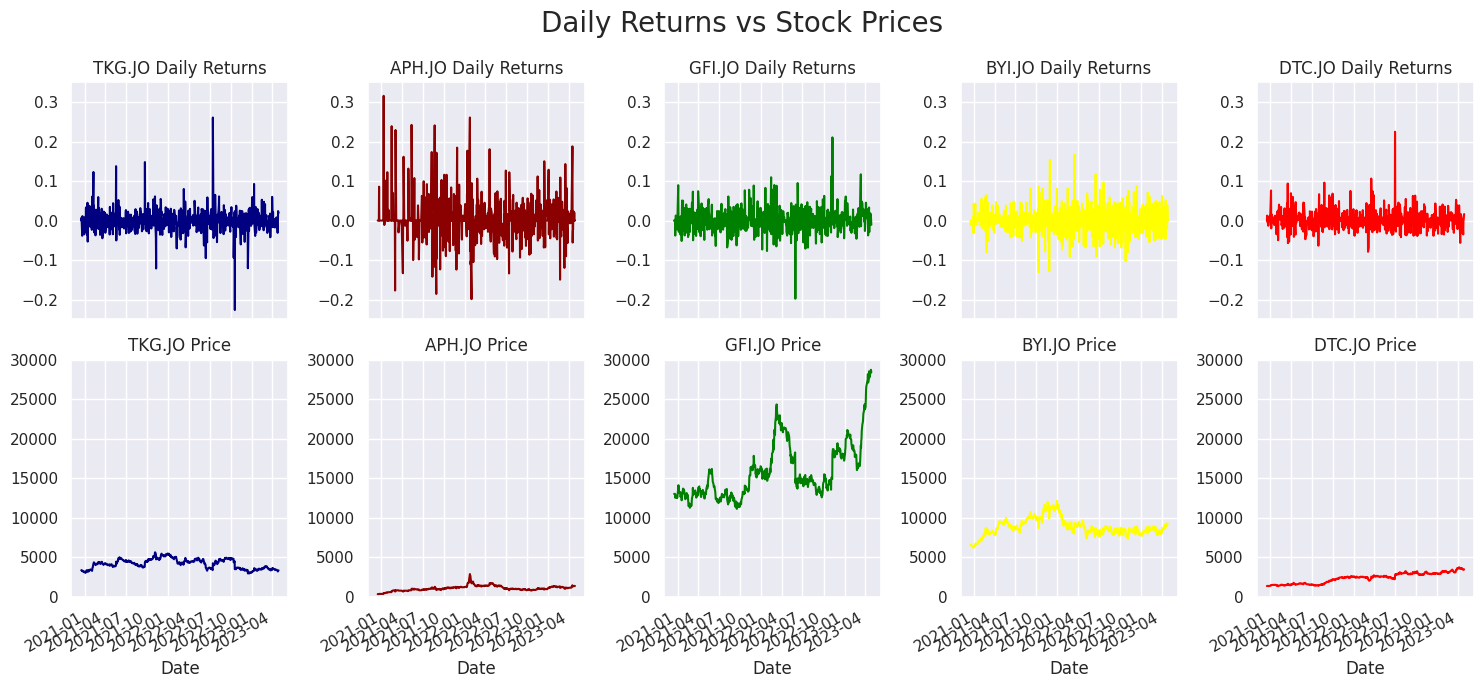

In [ ]:
colorlist = ['navy', 'darkred', 'green', 'yellow', 'red']
fig, ax = plt.subplots(2,5, figsize=(15,7), sharex=True)

for i, stock in enumerate(stock_list):
    daily_returns[stock].plot(ax=ax[0][i], color=colorlist[i])
    ax[0][i].set_title(stock + ' Daily Returns')
    ax[0][i].set_ylim(-0.25, 0.35)

    df[stock].plot(ax=ax[1][i], color=colorlist[i])
    ax[1][i].set_title(stock + ' Price')
    ax[1][i].set_ylim(0, 30000)

fig.suptitle('Daily Returns vs Stock Prices', fontsize=20)
plt.tight_layout()

Daily return statistics

1. *The Mean* - use this to calculate Annualized Returns
2. *Standard Deviation* - use this to calculate Annualized Volatility
3. *Kurtosis*: tell us about the tails of the normal distribution. the measure of Kurtosis tells us how much different our histogram is from that traditional normal distribution.

**Types of Kurtosis:**

Fat tails (value is positive): means that there are occasional and more frequent that would happen if we had a regular Gaussin distribution. There are frequently large excursions more frequently than if this was a normal distribution. (More occurrences out in the tails than would be expected if it were a normal distribution).


Skinny tails (value is negative): (Many fewer occurrences out on the tails than would be expected if it were a normal distribution).

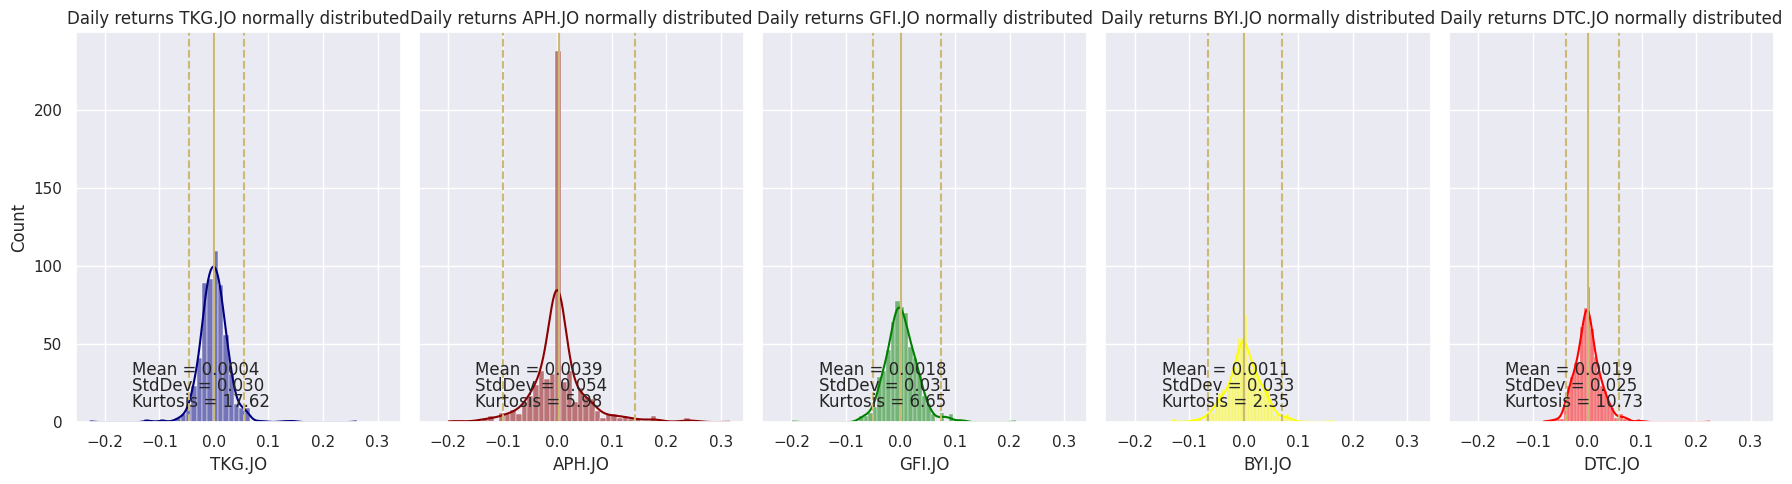

In [ ]:
colorlist = ['navy', 'darkred', 'green', 'yellow', 'red']
fig, ax = plt.subplots(1,5, figsize=(18,5), sharex=True, sharey=True)

for i, stock in enumerate(stock_list):
    sns.histplot(daily_returns[stock], bins=50, kde=True, color=colorlist[i], ax=ax[i])
    ax[i].set_title('Daily returns ' + stock + ' normally distributed')
    ax[i].axvline(daily_returns[stock].mean(), c='y')
    ax[i].axvline(np.percentile(daily_returns[stock],97.5), linestyle='--', c='y')
    ax[i].axvline(np.percentile(daily_returns[stock],2.5), linestyle='--', c='y')
    ax[i].text(-0.15, 30, 'Mean = {:.4f}'.format(daily_returns[stock].mean()))
    ax[i].text(-0.15, 20, 'StdDev = {:.3f}'.format(daily_returns[stock].std()))
    ax[i].text(-0.15, 10, 'Kurtosis = {:.2f}'.format(daily_returns[stock].kurtosis()))

plt.tight_layout()

Based on Kurtosis results: Indicates the presence of outliers and potential for more extreme events.

We are considering two general properties indicated by the histogram for each stock:
1. Return and
2. Volatility (or risk).

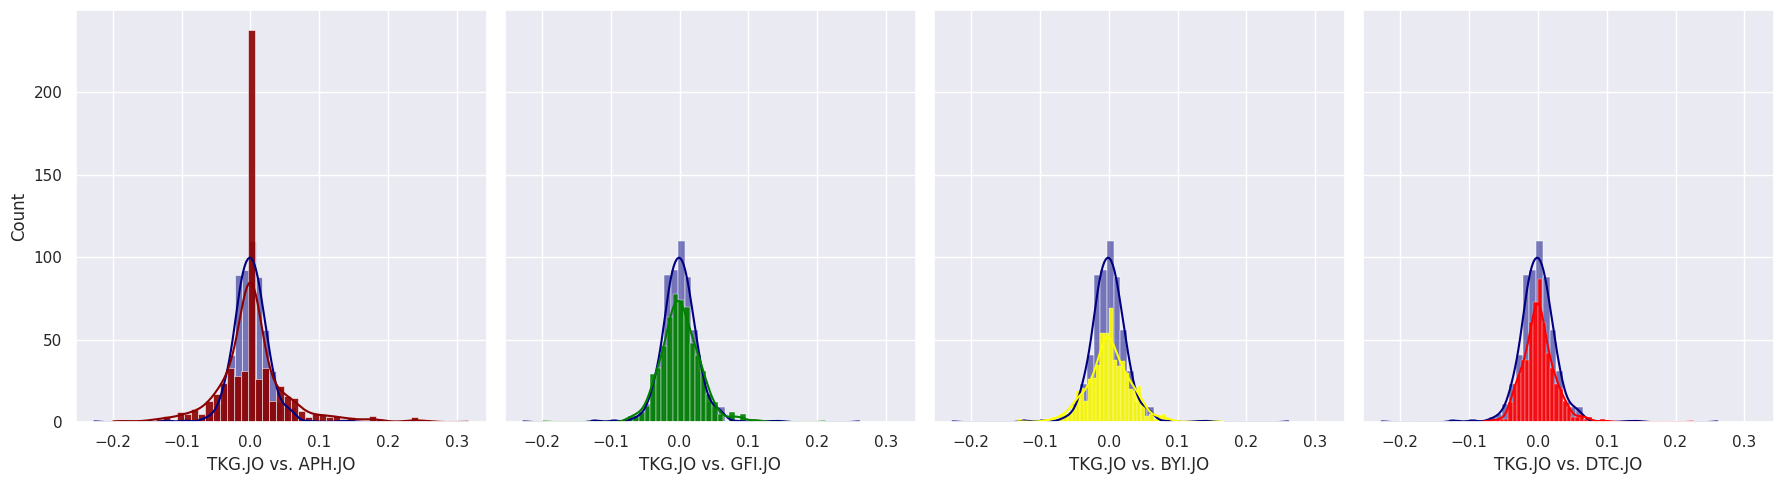

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(18,5), sharex=True, sharey=True)
sns.histplot(daily_returns['TKG.JO'], bins=50, color='navy', ax=ax[0], kde=True)
sns.histplot(daily_returns['APH.JO'], bins=50, color='darkred', ax=ax[0], kde=True, alpha=0.9)
ax[0].set_xlabel('TKG.JO vs. APH.JO')
sns.histplot(daily_returns['TKG.JO'], bins=50, color='navy', ax=ax[1], kde=True)
sns.histplot(daily_returns['GFI.JO'],  bins=50, color='green', ax=ax[1], kde=True, alpha=0.9)
ax[1].set_xlabel('TKG.JO vs. GFI.JO')
sns.histplot(daily_returns['TKG.JO'], bins=50, color='navy', ax=ax[2], kde=True)
sns.histplot(daily_returns['BYI.JO'], bins=50, color='yellow', ax=ax[2], kde=True, alpha=0.9)
ax[2].set_xlabel('TKG.JO vs. BYI.JO')
sns.histplot(daily_returns['TKG.JO'], bins=50, color='navy', ax=ax[3], kde=True)
sns.histplot(daily_returns['DTC.JO'], bins=50, color='red', ax=ax[3], kde=True, alpha=0.9)
ax[3].set_xlabel('TKG.JO vs. DTC.JO')
plt.tight_layout()

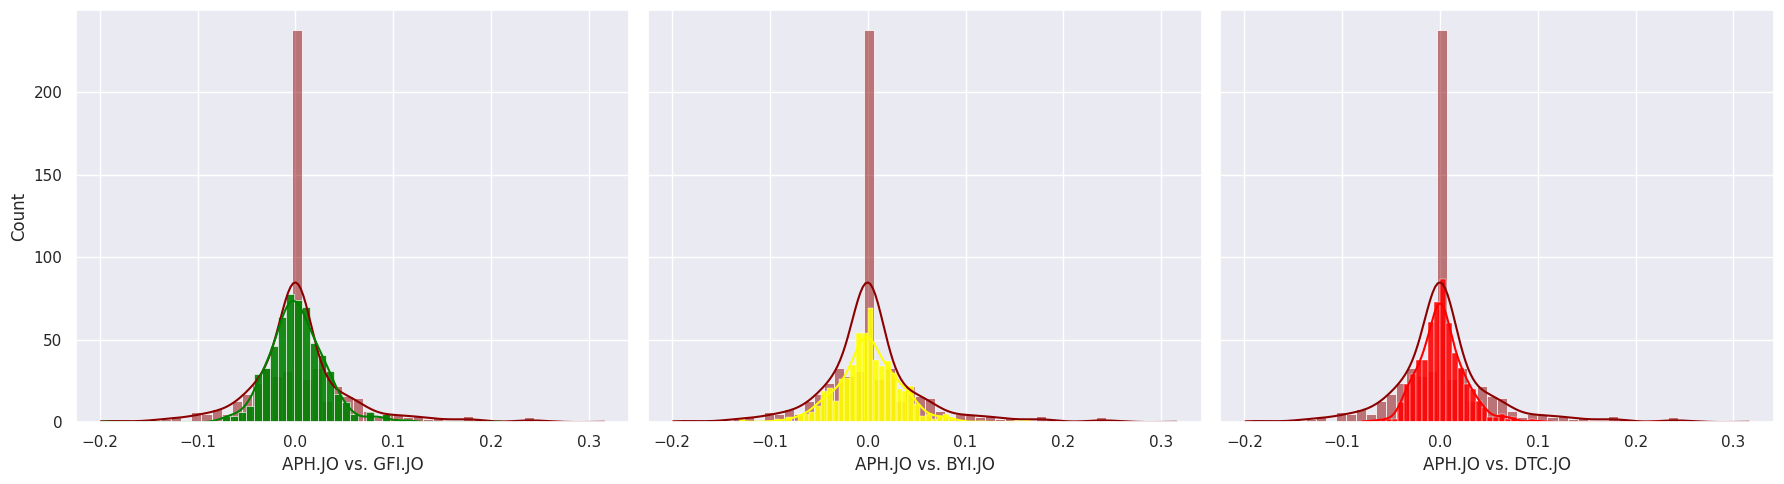

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(18,5), sharex=True, sharey=True)
sns.histplot(daily_returns['APH.JO'], bins=50, color='darkred', ax=ax[0], kde=True)
sns.histplot(daily_returns['GFI.JO'],  bins=50, color='green', ax=ax[0], kde=True, alpha=0.9)
ax[0].set_xlabel('APH.JO vs. GFI.JO')
sns.histplot(daily_returns['APH.JO'], bins=50, color='darkred', ax=ax[1], kde=True)
sns.histplot(daily_returns['BYI.JO'], bins=50, color='yellow', ax=ax[1], kde=True, alpha=0.9)
ax[1].set_xlabel('APH.JO vs. BYI.JO')
sns.histplot(daily_returns['APH.JO'], bins=50, color='darkred', ax=ax[2], kde=True)
sns.histplot(daily_returns['DTC.JO'], bins=50, color='red', ax=ax[2], kde=True, alpha=0.9)
ax[2].set_xlabel('APH.JO vs. DTC.JO')
plt.tight_layout()

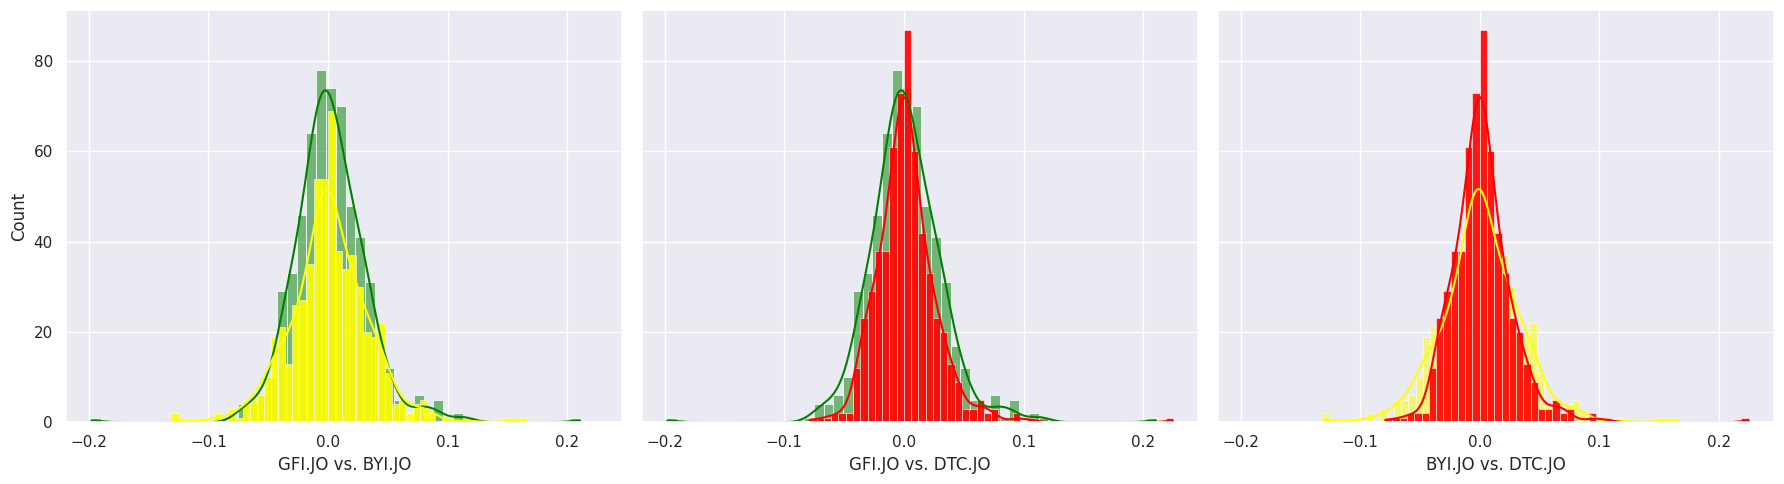

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(18,5), sharex=True, sharey=True)
sns.histplot(daily_returns['GFI.JO'], bins=50, color='green', ax=ax[0], kde=True)
sns.histplot(daily_returns['BYI.JO'], bins=50, color='yellow', ax=ax[0], kde=True, alpha=0.9)
ax[0].set_xlabel('GFI.JO vs. BYI.JO')
sns.histplot(daily_returns['GFI.JO'], bins=50, color='green', ax=ax[1], kde=True)
sns.histplot(daily_returns['DTC.JO'], bins=50, color='red', ax=ax[1], kde=True, alpha=0.9)
ax[1].set_xlabel('GFI.JO vs. DTC.JO')
sns.histplot(daily_returns['BYI.JO'], bins=50, color='yellow', ax=ax[2], kde=True)
sns.histplot(daily_returns['DTC.JO'], bins=50, color='red', ax=ax[2], kde=True, alpha=0.9)
ax[2].set_xlabel('BYI.JO vs. DTC.JO')
plt.tight_layout()

In [ ]:
df_ret_vol = pd.concat([annualized_returns.to_frame('Annualized Returns'), annualized_volatility.to_frame('Annualized Volatility')], axis=1)
print(df_ret_vol)

        Annualized Returns  Annualized Volatility
TKG.JO               0.110                  0.474
APH.JO               0.986                  0.864
GFI.JO               0.455                  0.492
BYI.JO               0.287                  0.529
DTC.JO               0.486                  0.403


For returns comparison, refer to Normalization plot. For volatility comparison, refer to the above plot (fat/wider means higher volatility)

1. APH has higher return and higher volatility than all of them
2. TKG has lower return than all of them and lower volatility than APH, GFI and BYI
3. DTC has lower return and slightly lower volatility than GFI
4. BYI has lower return than A higher volatility than GFI and DTC

A portfolio is a collection of a number of stocks with different allocations. Before building a portfolio, we need the understand the concept of correlations.

Correlation is a statistical measure that describes the extent to which two variables are related. In the context of investing, correlation refers to the relationship between the prices of two or more assets.

#### Correlations

In [ ]:
daily_returns.corr()

,TKG.JO,APH.JO,GFI.JO,BYI.JO,DTC.JO
TKG.JO,1.000,0.054,0.046,0.087,0.127
APH.JO,0.054,1.000,0.004,0.106,0.070
GFI.JO,0.046,0.004,1.000,-0.058,0.026
BYI.JO,0.087,0.106,-0.058,1.000,0.061
DTC.JO,0.127,0.070,0.026,0.061,1.000


[[1.         0.05376644]
 [0.05376644 1.        ]]
[[1.         0.04631132]
 [0.04631132 1.        ]]
[[1.         0.08674843]
 [0.08674843 1.        ]]
[[1.         0.12674979]
 [0.12674979 1.        ]]
[[1.         0.06997802]
 [0.06997802 1.        ]]
[[1.         0.00390382]
 [0.00390382 1.        ]]
[[1.         0.10627647]
 [0.10627647 1.        ]]
[[ 1.         -0.05820152]
 [-0.05820152  1.        ]]
[[1.         0.02569331]
 [0.02569331 1.        ]]
[[1.         0.06086327]
 [0.06086327 1.        ]]


<Axes: >

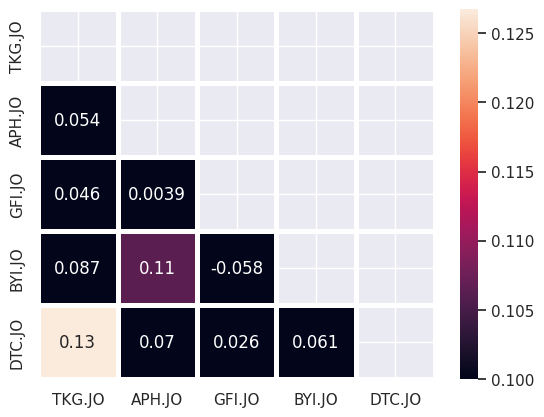

In [ ]:
print(np.corrcoef(daily_returns['TKG.JO'], daily_returns['APH.JO']))
print(np.corrcoef(daily_returns['TKG.JO'], daily_returns['GFI.JO']))
print(np.corrcoef(daily_returns['TKG.JO'], daily_returns['BYI.JO']))
print(np.corrcoef(daily_returns['TKG.JO'], daily_returns['DTC.JO']))
print(np.corrcoef(daily_returns['APH.JO'], daily_returns['DTC.JO']))
print(np.corrcoef(daily_returns['APH.JO'], daily_returns['GFI.JO']))
print(np.corrcoef(daily_returns['APH.JO'], daily_returns['BYI.JO']))
print(np.corrcoef(daily_returns['GFI.JO'], daily_returns['BYI.JO']))
print(np.corrcoef(daily_returns['GFI.JO'], daily_returns['DTC.JO']))
print(np.corrcoef(daily_returns['BYI.JO'], daily_returns['DTC.JO']))

import seaborn as sns

#take the bottom triangle since it repeats itself
mask = np.zeros_like(daily_returns.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(daily_returns.corr(), annot=True, vmin=0.1, mask=mask, linewidths=2.5)

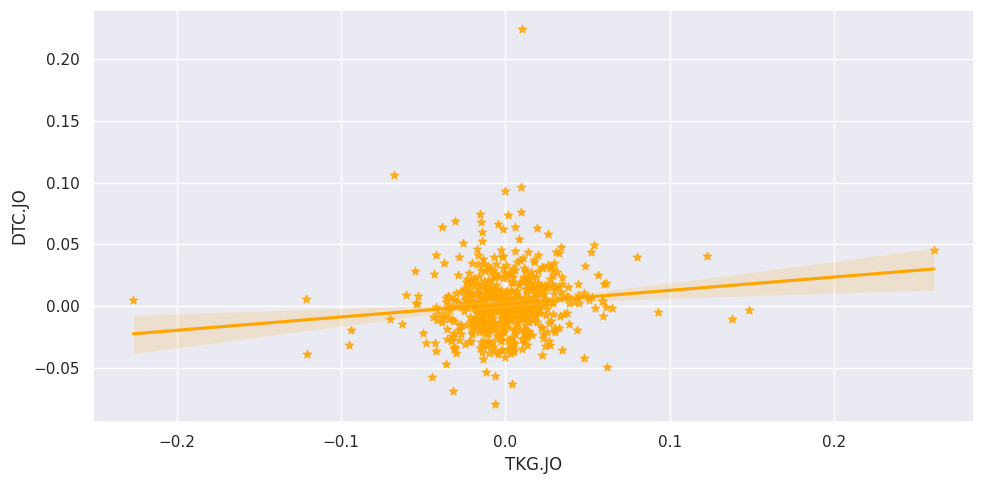

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5), sharex=True, sharey=True)
sns.regplot(data=daily_returns, x=daily_returns['TKG.JO'], y=daily_returns['DTC.JO'] ,scatter=True, marker='*', ax=ax, color='orange')
plt.tight_layout()

*Correlation Coefficient and P-value*

In [ ]:
coeff, pval = stats.pearsonr(daily_returns['TKG.JO'], daily_returns['DTC.JO'])
print('CorrCoeff TKG/DTC= {:,.0f}'.format(coeff), 'Pval={}'.format(pval))

CorrCoeff TKG/DTC= 0 Pval=0.0020378349956814753


β (Beta = Slop): is how reactive is the market to the stock.

α (Alpha = Intercept): is how well the market performs with respect of stock

In [ ]:
beta_DTC_TKG, alpha_DTC_TKG = np.polyfit(daily_returns['TKG.JO'], daily_returns['DTC.JO'],1)
print('beta TKG/DTC= {}'.format(beta_DTC_TKG), 'alpha TKG/DTC= {}'.format(alpha_DTC_TKG))

beta TKG/DTC= 0.10789081413399393 alpha TKG/DTC= 0.0018763996741585432


When TKG price goes up 1%, DTC goes up by 0.11%

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm

ml = daily_returns.copy()
ml['intercept'] = 1
lm = sm.OLS(ml['DTC.JO'], ml[['intercept', 'TKG.JO']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DTC.JO   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     9.601
Date:                Sun, 27 Aug 2023   Prob (F-statistic):            0.00204
Time:                        15:59:15   Log-Likelihood:                 1335.9
No. Observations:                 590   AIC:                            -2668.
Df Residuals:                     588   BIC:                            -2659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0019      0.001      1.809      0.071      -0.000       0.004
TKG.JO         0.1079      0.035      3.099      0.002       0.040       0.176
==============================================================================
Omnibus:                      262.032   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3224.638
Skew:                           1.621   Prob(JB):                         0.00
Kurtosis:                      13.985   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- When TKG price goes up 1%, DTC goes up by 0.11%
- 1.6% of the variability in DTC price can be explained by TKG price.

### Cumulative Return Ratio:

is the Profit/Loss ratio of the stock on a particular period.

CR(t) = (price[t]/price[0])-1

In [ ]:
print('Cumulative return of TKG is: {:.0f} %'.format(((df.iloc[-1]['TKG.JO'] / df.iloc[0]['TKG.JO']) - 1) * 100))
print('Cumulative return of APH is: {:.0f} %'.format(((df.iloc[-1]['APH.JO'] / df.iloc[0]['APH.JO']) - 1) * 100))
print('Cumulative return of GFI is: {:.0f} %'.format(((df.iloc[-1]['GFI.JO'] / df.iloc[0]['GFI.JO']) - 1) * 100))
print('Cumulative return of BYI is: {:.0f} %'.format(((df.iloc[-1]['BYI.JO'] / df.iloc[0]['BYI.JO']) - 1) * 100))
print('Cumulative return of DTC is: {:.0f} %'.format(((df.iloc[-1]['DTC.JO'] / df.iloc[0]['DTC.JO']) - 1) * 100))

Cumulative return of TKG is: -0 %
Cumulative return of APH is: 331 %
Cumulative return of GFI is: 119 %
Cumulative return of BYI is: 41 %
Cumulative return of DTC is: 158 %


APH stock price increased by 331% during the period while DTC stock price increased 158% and GFI stock price increased by 119%.
During the same period the TKD decreased by 0%.

### Daily Portfolio Value (DPV):
Calculating overall value of a portfolio Day by Day

Given:
- start value (start_val): Portfolio Value (the amount of investment)
- start date and end date
- allocations (allocs): allocating the portfolio value on the stocks
- Position value (pos_val): at each day, that's how much that position is worth
- Portfolio value (portfolio_daily_returns): reflects the value each day for our total portfolio

- normailze the prices = price/price[0]
- allocs = norm * allocations
- pos_val = allocs * start_value
- portfolio_daily_returns = pos_val.sum(axis=1)
- Portfolio Statistics

Daily return of portfolio
- Mean and StdDev
- Portfolio Performance Metrics

Portfolio Values
-Annualized Returns
- Annualized Volatility
- Sharpe Ratio

### Portfolio 1 vs Portfolio 2

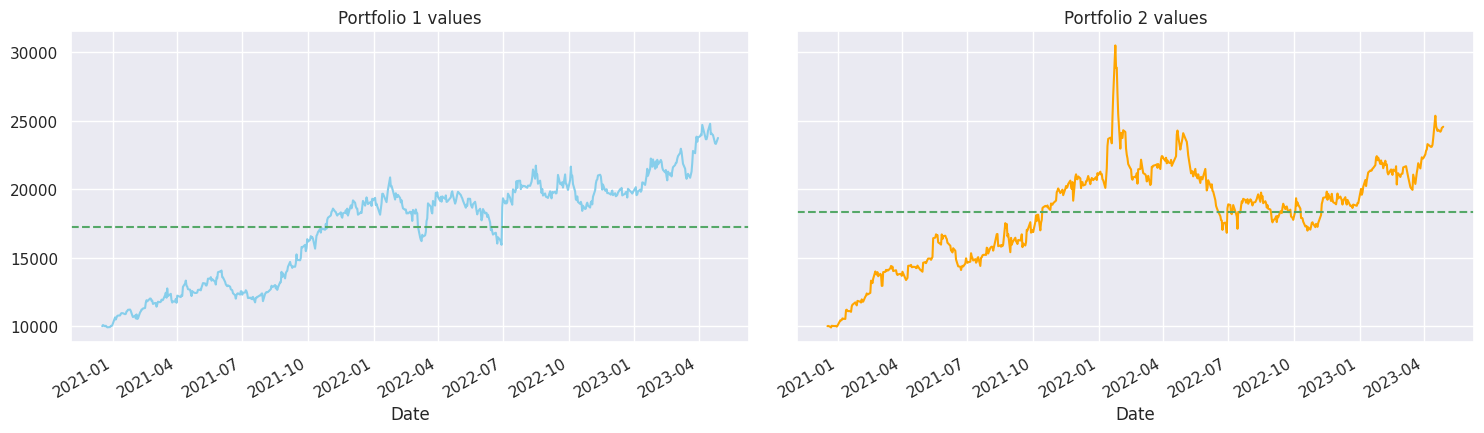

In [ ]:
def portval (allocations = [], start_value = 0):
    '''to get daily portfolio value based on allocation'''
    allocs = norm.copy() * allocations
    pos_val = allocs * start_value
    port_val = pos_val.sum(axis=1)
    return port_val

fig, ax = plt.subplots(1, 2, figsize=(15, 4.5), sharex=True, sharey=True)

#assume our start value = R10 000
#baseline allocation: 10% TKG, 5% APH, 5% GFI, 10% BYI, 70% DTC
port_val1 = portval([0.1, 0.05, 0.05, 0.1, 0.7], 10000)
port_val1.plot(ax=ax[0], color='skyblue')
ax[0].axhline(np.mean(port_val1), linestyle='--', c='g')
ax[0].set_title('Portfolio 1 values')

#new allocation: 10% TKG, 20% APH, 20% GFI, 20% BYI, 30% DTC
port_val2 = portval([0.1, 0.2, 0.2, 0.2, 0.3], 10000)
port_val2.plot(ax=ax[1], color='orange')
ax[1].axhline(np.mean(port_val2), linestyle='--', c='g')
ax[1].set_title('Portfolio 2 values')
plt.tight_layout()

Portfolio Values

In [ ]:
print('Portfolio 1 Value:  $', round(port_val1[-1], 2))
print('Portfolio 2 Value:  $', round(port_val2[-1], 2))

Portfolio 1 Value:  $ 23738.34
Portfolio 2 Value:  $ 24556.95


Cumulative Return Ratio of DPV

In [ ]:
cum_return1 = ((port_val1.iloc[-1] / port_val1.iloc[0]) -1) * 100
print('Cumulative return of Portfolio 1 is {:.1f} %'.format(cum_return1))
cum_return2 = ((port_val2.iloc[-1] / port_val2.iloc[0]) -1) * 100
print('Cumulative return of Portfolio 2 is {:.1f} %'.format(cum_return2))

Cumulative return of Portfolio 1 is 137.4 %
Cumulative return of Portfolio 2 is 145.6 %


Mean and Std Dev of DPV (Daily Portfolio Value)

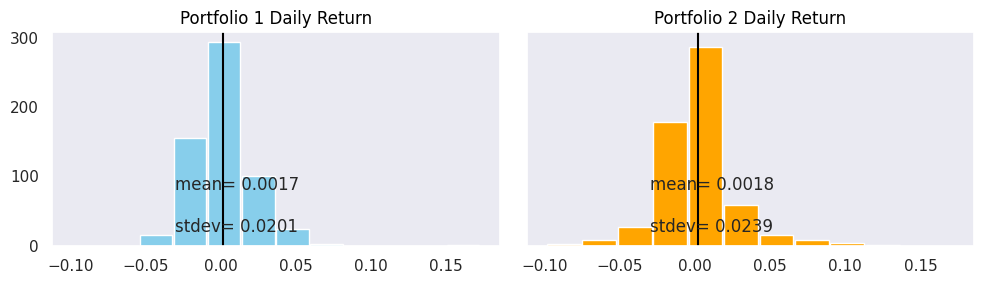

In [ ]:
portfolio_daily_returns1 = port_val1.pct_change()
portfolio_daily_returns1.iloc[0] = 0

portfolio_daily_returns2 = port_val2.pct_change()
portfolio_daily_returns2.iloc[0] = 0

fig, ax = plt.subplots(1, 2, figsize=(10,3), sharex=True, sharey=True)

portfolio_daily_returns1.hist(grid=False, rwidth=0.95, ax=ax[0], color='skyblue')
ax[0].axvline(np.mean(portfolio_daily_returns1), c='black')
ax[0].text(-0.03, 80, 'mean= {:.4f}'.format(np.mean(portfolio_daily_returns1)))
ax[0].text(-0.03, 20, 'stdev= {:.4f}'.format(np.std(portfolio_daily_returns1)))
ax[0].set_title('Portfolio 1 Daily Return', c='black')

portfolio_daily_returns2.hist(grid=False, rwidth=0.95, ax=ax[1], color='orange')
ax[1].axvline(np.mean(portfolio_daily_returns2), c='black')
ax[1].text(-0.03, 80, 'mean= {:.4f}'.format(np.mean(portfolio_daily_returns2)))
ax[1].text(-0.03, 20, 'stdev= {:.4f}'.format(np.std(portfolio_daily_returns2)))
ax[1].set_title('Portfolio 2 Daily Return', c='black')
plt.tight_layout()

In [ ]:
print('Portfolio 1')
print('Mean (Return) Value = {:.2f}'.format(np.mean(port_val1.iloc[1:])), ' ' , 'Standard Deviation (Volatility) Value = {:.2f}'.format(np.std(port_val1.iloc[1:])))
print('Mean (Return) Ratio = {:.2f}'.format(np.mean(portfolio_daily_returns1) * 100),'%', '  ' , 'Standard Deviation (Volatility) Ratio = {:.2f} %'.format(np.std(portfolio_daily_returns1) * 100))
print('Portfolio 2')
print('Mean (Return) Value = {:.2f}'.format(np.mean(port_val2.iloc[1:])), ' ' ,'Standard Deviation (Volatility) Value = {:.2f}'.format(np.std(port_val2.iloc[1:])))
print('Mean (Return) Ratio = {:.2f}'.format(np.mean(portfolio_daily_returns2) * 100),'%', '  ' , 'Standard Deviation (Volatility) Ratio = {:.2f} %'.format(np.std(portfolio_daily_returns2) * 100))

Portfolio 1
Mean (Return) Value = 17219.76   Standard Deviation (Volatility) Value = 3728.94
Mean (Return) Ratio = 0.17 %    Standard Deviation (Volatility) Ratio = 2.01 %
Portfolio 2
Mean (Return) Value = 18367.91   Standard Deviation (Volatility) Value = 3496.69
Mean (Return) Ratio = 0.18 %    Standard Deviation (Volatility) Ratio = 2.39 %


Annualized Returns

In [ ]:
annualized_returns1 = port_val1.pct_change().mean() * 252
annualized_returns2 = port_val2.pct_change().mean() * 252

print('Portfolio 1 Annualized Returns: ', round(annualized_returns1, 3))
print('Portfolio 2 Annualized Returns: ', round(annualized_returns2, 3))

Portfolio 1 Annualized Returns:  0.42
Portfolio 2 Annualized Returns:  0.456


Annualized Volatility

In [ ]:
annualized_volatility1 = port_val1.pct_change().std() * np.sqrt(252)
annualized_volatility2 = port_val2.pct_change().std() * np.sqrt(252)

print('Portfolio 1 Annualized Volatility: ', round(annualized_volatility1, 3))
print('Portfolio 2 Annualized Volatility: ', round(annualized_volatility2, 3))

Portfolio 1 Annualized Volatility:  0.319
Portfolio 2 Annualized Volatility:  0.38


We can notice clearly that the return of Portfolio 2 is higher than that of Portfolio 1, but the risk (StdDev) is also higher, and we already expected this (high risk = high returns)

#### SHARPE RATIO:

is a metric that evaluates risk and returns together, in order to help investors in the selection of such investment that generates higher returns for the optimal risk taken.

*For comparison:* The higher the sharpe ratio the better

In [ ]:
portfolio_daily_returns1 = port_val1.pct_change()
SR1 = np.sqrt(252) * np.mean(portfolio_daily_returns1) / np.std(portfolio_daily_returns1)
print('Sharpe Ratio Portfolio 1 = {:.3f}%'.format(SR1))

portfolio_daily_returns2 = port_val2.pct_change()
SR2 = np.sqrt(252) * np.mean(portfolio_daily_returns2) / np.std(portfolio_daily_returns2)
print('Sharpe Ratio Portfolio 2 = {:.3f}%'.format(SR2))

Sharpe Ratio Portfolio 1 = 1.318%
Sharpe Ratio Portfolio 2 = 1.201%


Portfolio 1 value = $23738
Portfolio 2 value = $24557


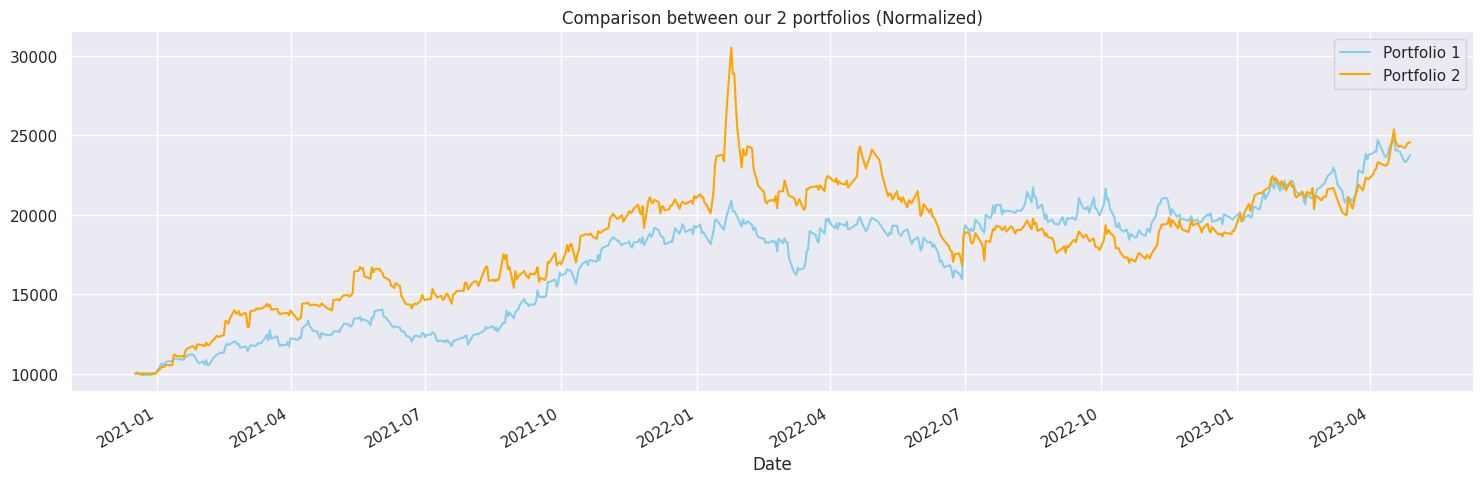

In [60]:
fig, ax = plt.subplots(figsize=(15, 5))
port_val1.plot(ax=ax, color='skyblue')
port_val2.plot(ax=ax, color='orange')
plt.legend(['Portfolio 1', 'Portfolio 2'])
plt.title('Comparison between our 2 portfolios (Normalized)')
print('Portfolio 1 value = ${:.0f}'.format(port_val1[-1]))
print('Portfolio 2 value = ${:.0f}'.format(port_val2[-1]))
plt.tight_layout()

confirming the above result, we can see here the Sharpe Ratio of Portfolio 2 is higher than portfolio 1